In [2]:
import numpy as np
import matplotlib.pyplot as plt


**1.1**


In [29]:
J = np.array([[1, 5, 35],
            [14, 2, 0],
            [0, 31, 67],
            [96, 110, 78],
            [0, 0, 0]])

A = np.array([[15, 23, 10],
              [54, 96, 240],
              [0, 3, 9],
              [12, 31, 27],
              [8, 14, 6]])

S = np.array([[48, 78, 170],
              [2, 0, 0,],
              [0, 11, 14],
              [25, 13, 12],
              [131, 96, 43]])

sp1_sum = np.sum(J[0,:] + A[0,:] + S[0,:]) #first row (down), then column (to the side)
sp2_sum = np.sum(J[1,:] + A[1,:] + S[1,:]) #add all arrarys and then the sum of all
sp3_sum = np.sum(J[2,:] + A[2,:] + S[2,:])
print(f'species 1: ', sp1_sum)
print(f'species 2: ', sp2_sum)
print(f'species 3: ', sp3_sum)

species 1:  385
species 2:  408
species 3:  135


**1.2**

In [38]:
#j_site_1 = np.matmul(J[:, 0])


for i in range(len(J)):
    v = J[i,0] * 1
    x = J[i,1] * 2
    y = J[i,2] * 4
    print(f" July Site {i+1}: sp1={v}, sp2={x}, sp3={y}")

print("\n")

for i in range(len(A)):
    v = A[i,0] * 1
    x = A[i,1] * 2
    y = A[i,2] * 4
    print(f" August Site {i+1}: sp1={v}, sp2={x}, sp3={y}")

print("\n")

for i in range(len(S)):
    v = S[i,0] * 1
    x = S[i,1] * 2
    y = S[i,2] * 4
    print(f" September Site {i+1}: sp1={v}, sp2={x}, sp3={y}")

#ges_J_Site_1 = np.sum("July_Site_1")
#print(ges_J_Site_1)
#müsste noch alles addieren in jeder site also mit np.matmul viel einfacher hier jetzt zu kompliziert upsi


 July Site 1: sp1=1, sp2=10, sp3=140
 July Site 2: sp1=14, sp2=4, sp3=0
 July Site 3: sp1=0, sp2=62, sp3=268
 July Site 4: sp1=96, sp2=220, sp3=312
 July Site 5: sp1=0, sp2=0, sp3=0


 August Site 1: sp1=15, sp2=46, sp3=40
 August Site 2: sp1=54, sp2=192, sp3=960
 August Site 3: sp1=0, sp2=6, sp3=36
 August Site 4: sp1=12, sp2=62, sp3=108
 August Site 5: sp1=8, sp2=28, sp3=24


 September Site 1: sp1=48, sp2=156, sp3=680
 September Site 2: sp1=2, sp2=0, sp3=0
 September Site 3: sp1=0, sp2=22, sp3=56
 September Site 4: sp1=25, sp2=26, sp3=48
 September Site 5: sp1=131, sp2=192, sp3=172


In [ ]:
#after I saw the hint, now we multiply the matrix from ech month wite a vektor (R 3x1) and we got the sum for ech site

factors = np.array([1, 2, 4])

J_total = np.matmul(J, factors)

A_total = np.matmul(A, factors)

S_total = np.matmul(S, factors)

print("July per site:", J_total)
print("August per site:", A_total)
print("September per site:", S_total)

July per site: [151  18 330 628   0]
August per site: [ 101 1206   42  182   60]
September per site: [884   2  78  99 495]


**2**

In [47]:
u_wind = np.loadtxt("/Users/hannahbuss/Downloads/UNI METEO/Master/Data_Scince/Übung Daten /exercise2_u_component_wind.csv", delimiter=",", skiprows=1)
#print(u_wind)
v_wind = np.loadtxt("/Users/hannahbuss/Downloads/UNI METEO/Master/Data_Scince/Übung Daten /exercise2_v_component_wind.csv", delimiter=",", skiprows=1)
#print(v_wind)
print(len(v_wind))

124416


124416 Daten Punkte, weil Breitengrad hat 73 Punkte (von -90 bis 90 in 2.5° Schritten) und Längengrad hat 145 Punkte (von 360 bis 0 in 2.5° Schritten). Also 73 * 145 = 10585 Daten Punkte. das durch 124416 ungefär 12 also 12 Monate, Daten erst mal umstrukturueren in 3D Array mit Dimensionen (12, 73, 145). Dabei ist dann [u, :, :] der Wind im Januar 

In [ ]:
u_wind = u_wind.reshape(12, 72, 144)
v_wind = v_wind.reshape(12, 72, 144)

lats = np.linspace(-90 + 2.5/2, 90 - 2.5/2, 72)   # -88.75 bis 88.75
lons = np.linspace(0 + 2.5/2, 360 - 2.5/2, 144)   # 1.25 bis 358.75
lon2d, lat2d = np.meshgrid(lons, lats) #meshgrid für aus 1D Arrays 2D Arrays machen um zu wissen welcher Wert an welcher Position ist 


#konnten nicht 73 und 145 nehmen, weil es sonst nicht aufgegangen ist mit der Anzahl der Datenpunkte, weil nur gerundet

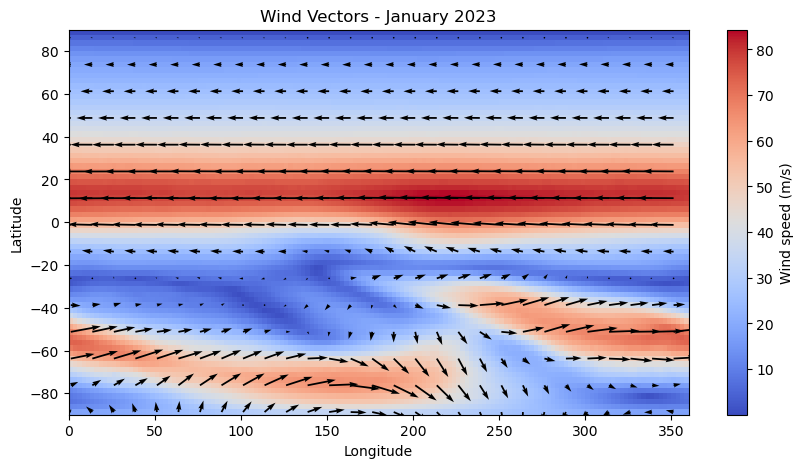

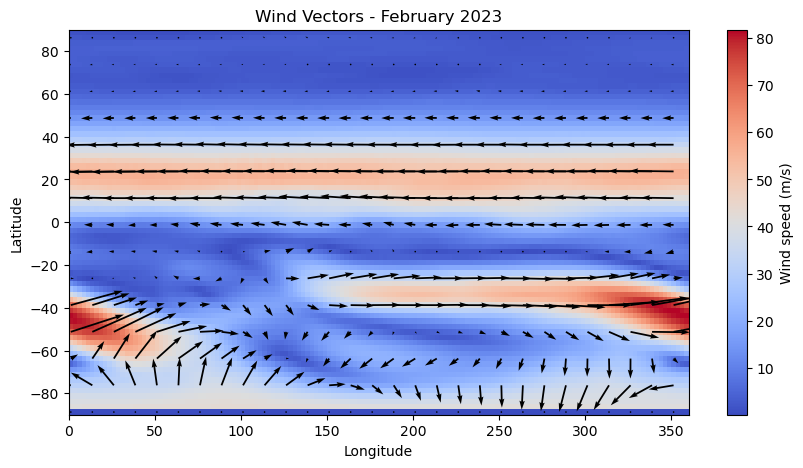

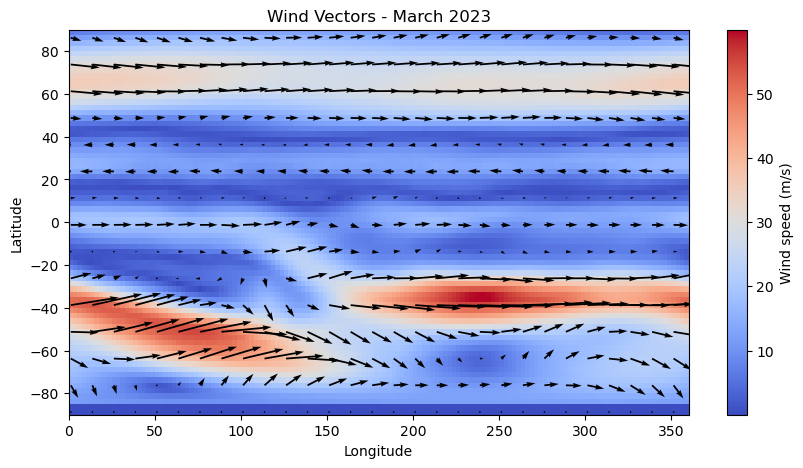

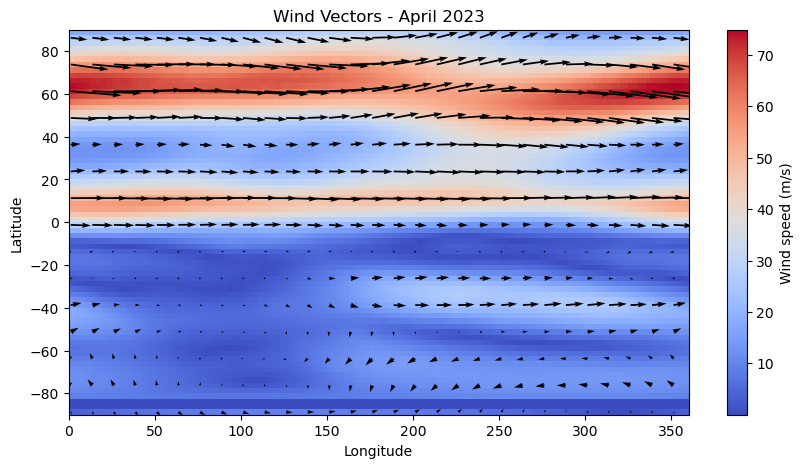

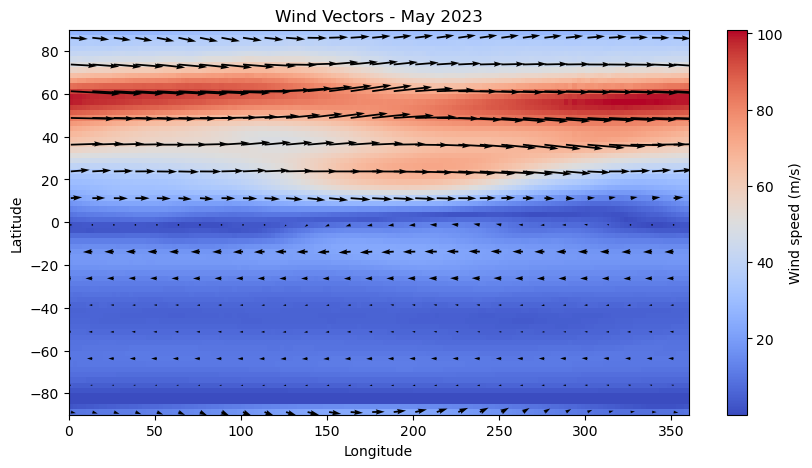

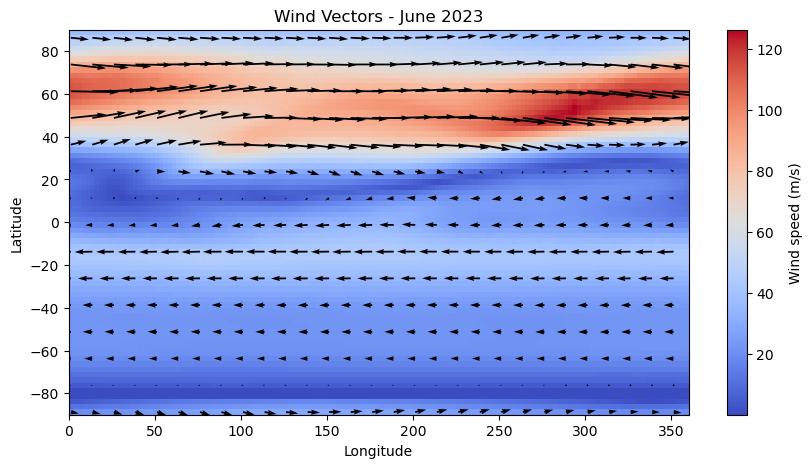

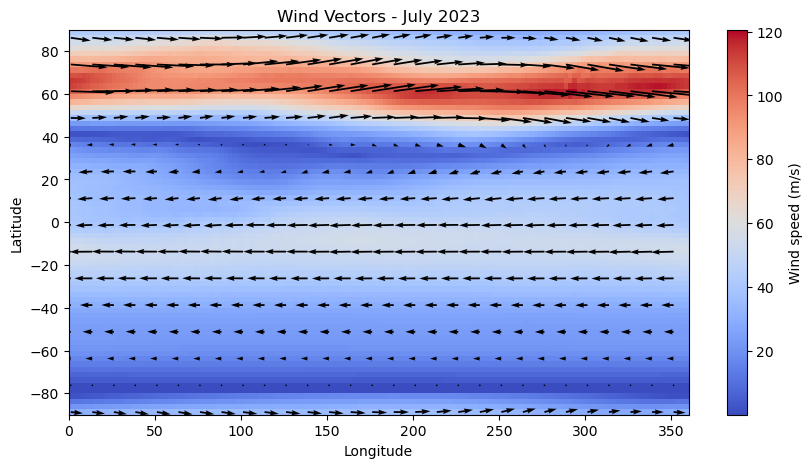

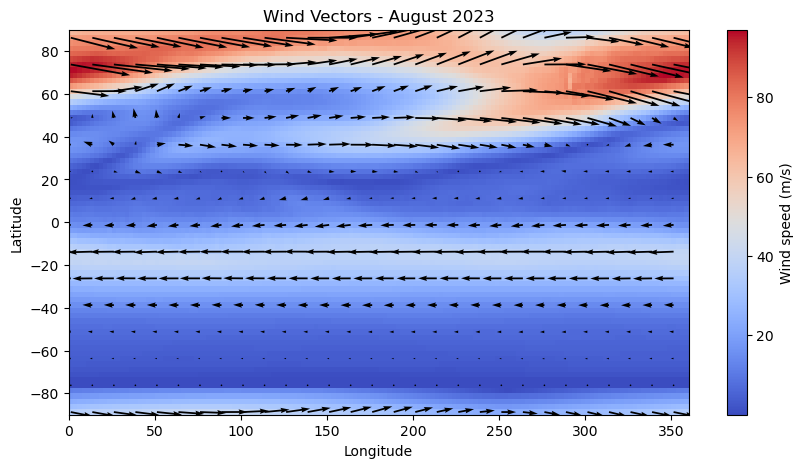

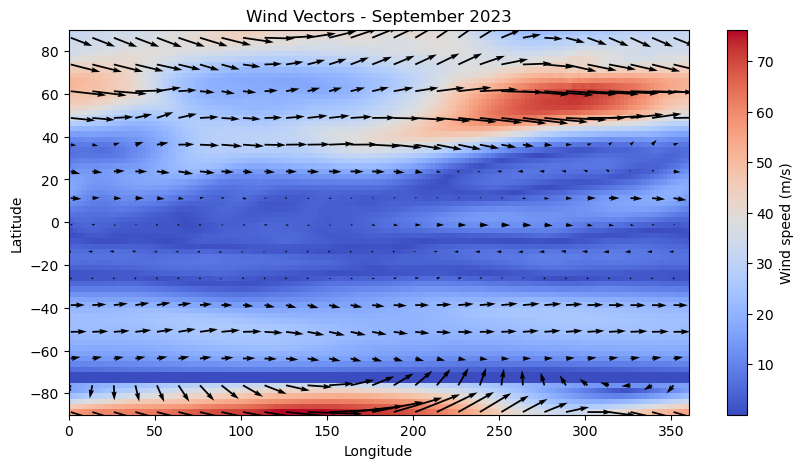

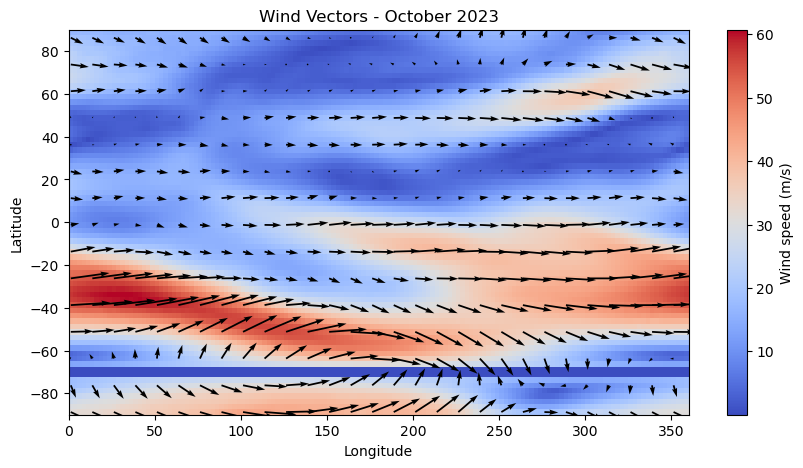

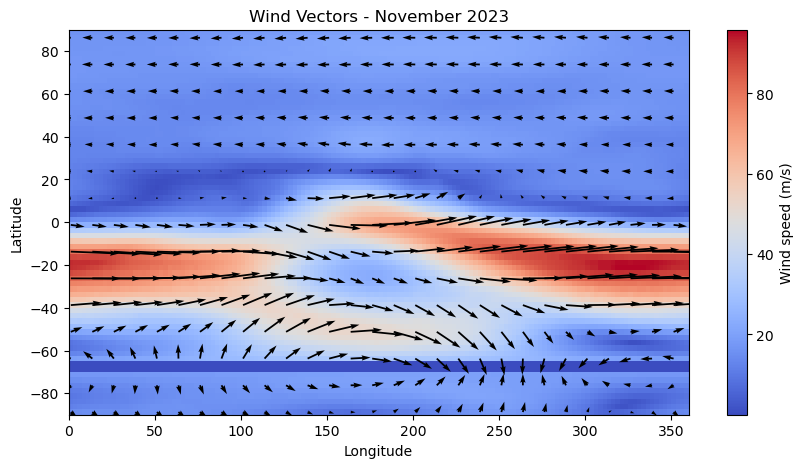

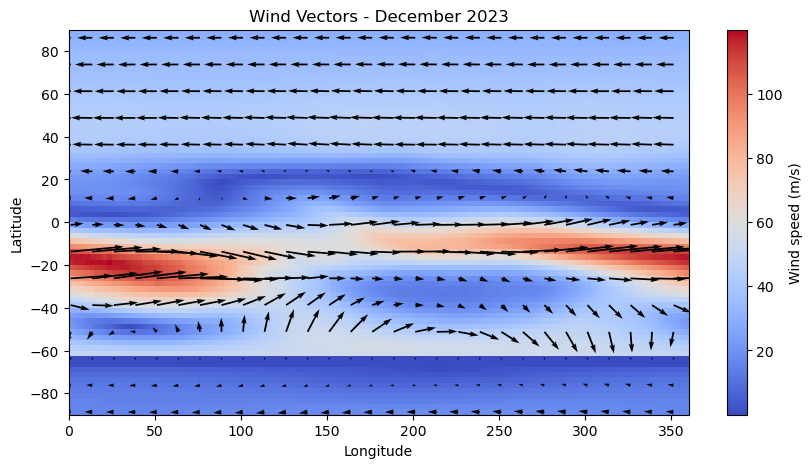

In [ ]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

for i in range(12):
    u = u_wind[i,:,:]
    v = v_wind[i,:,:]
    speed = np.sqrt(u**2 + v**2) #schleife über alle Monate 0 bis 12 und windgeschwindigkeit berechnet mit Wurzel aus u² + v² 
#Betrag von demVektor V ist die Windgeschwindigkeit

    plt.figure(figsize=(10,5))
    plt.pcolormesh(lon2d, lat2d, speed, cmap="coolwarm", shading="auto")
    plt.colorbar(label="Wind speed (m/s)")
    plt.quiver(lon2d[::5, ::5], lat2d[::5, ::5], u[::5, ::5], v[::5, ::5], color="k") #jeden 5ten Pfeil 
    plt.title(f"Wind Vectors - {months[i]} 2023")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
    plt.close()
    

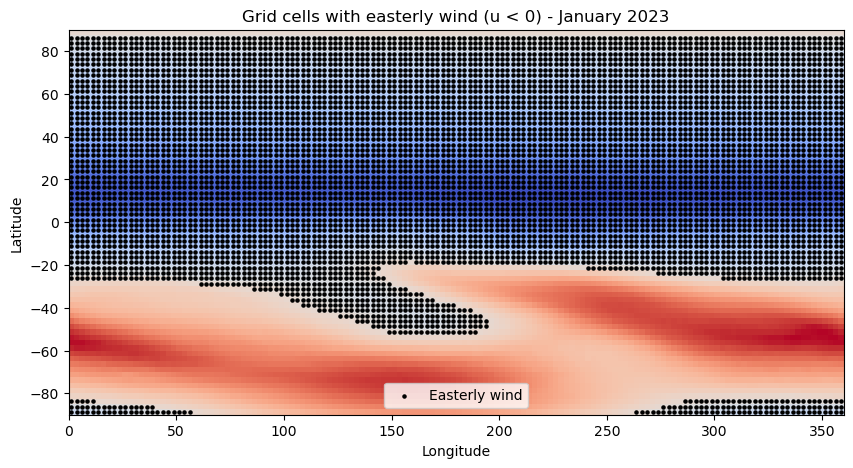

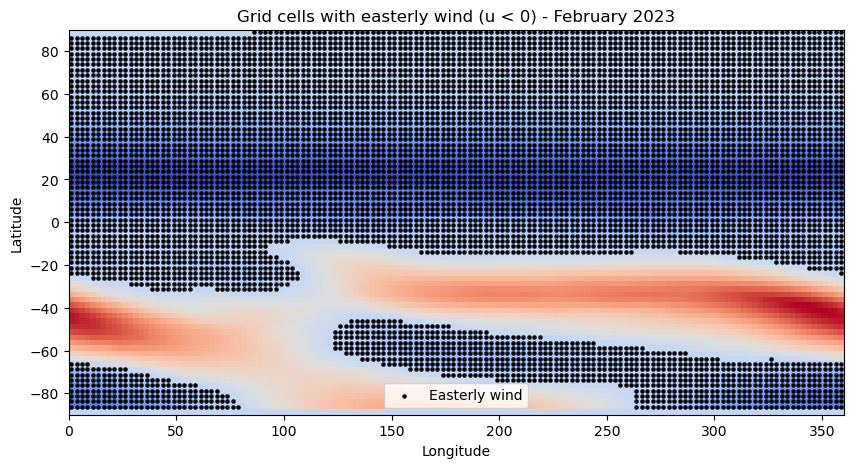

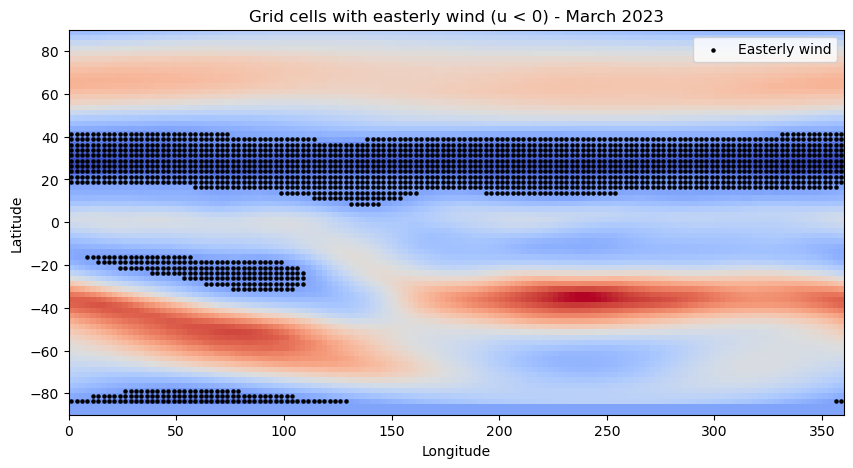

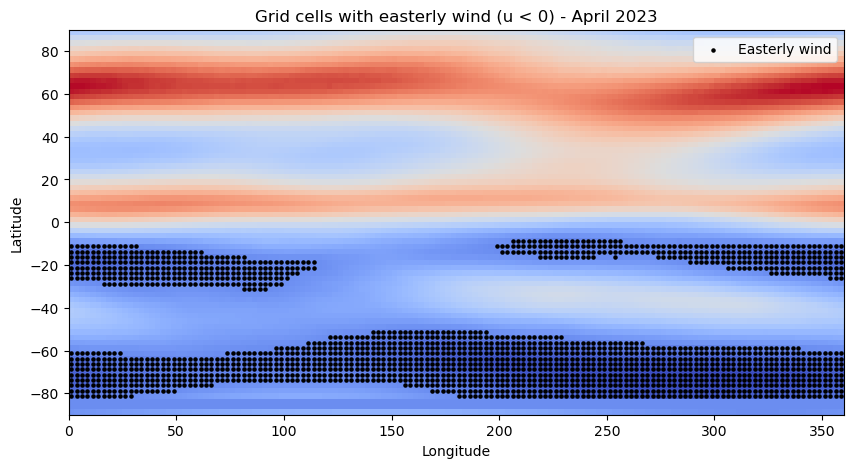

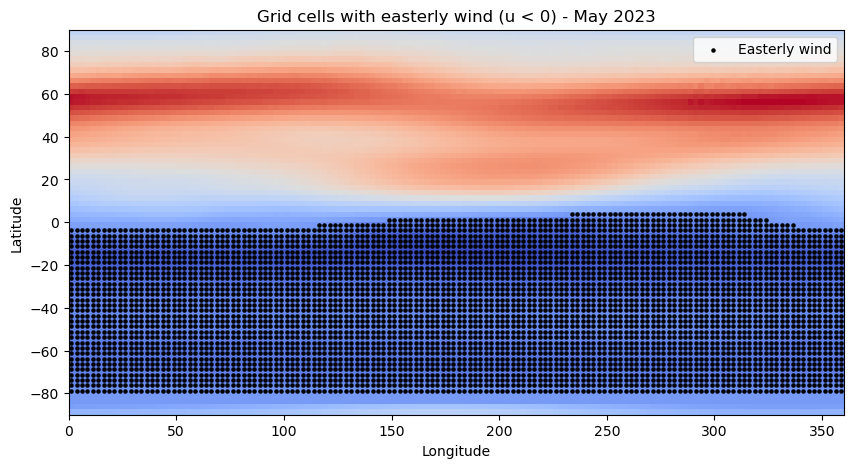

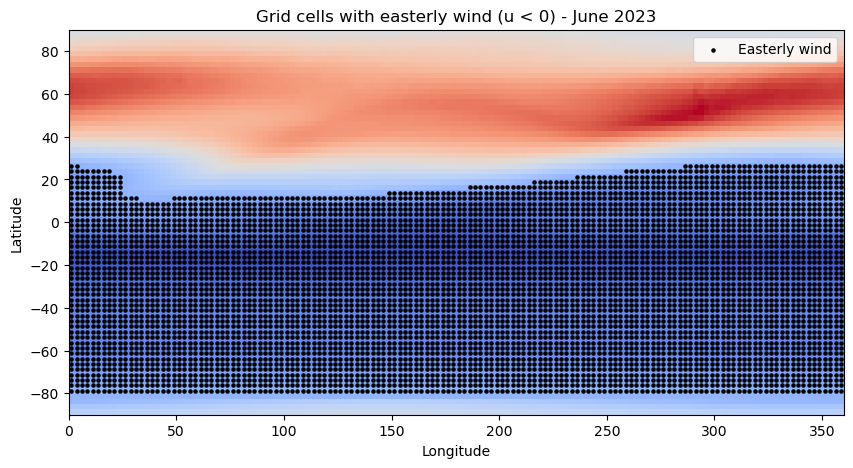

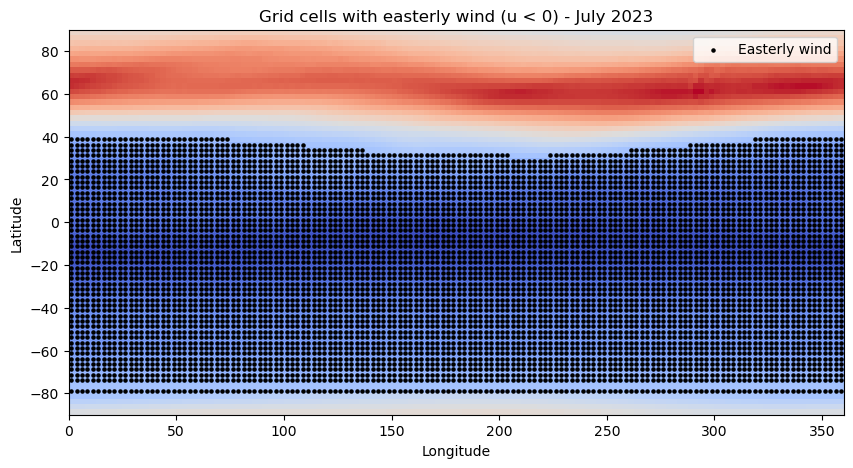

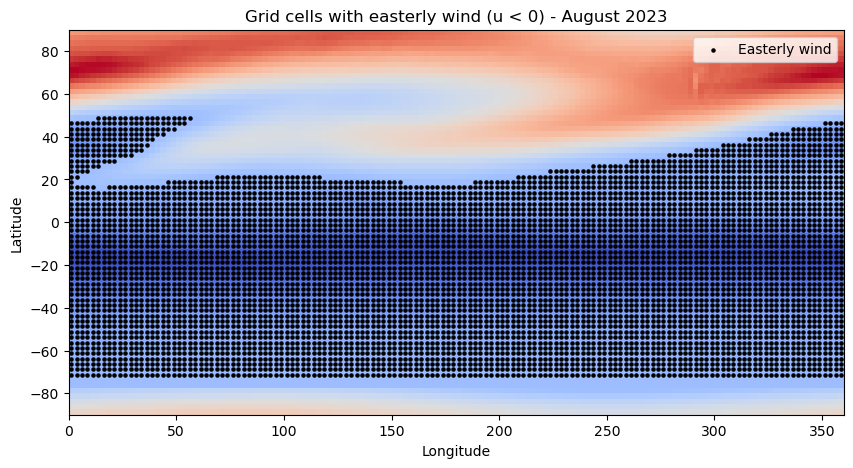

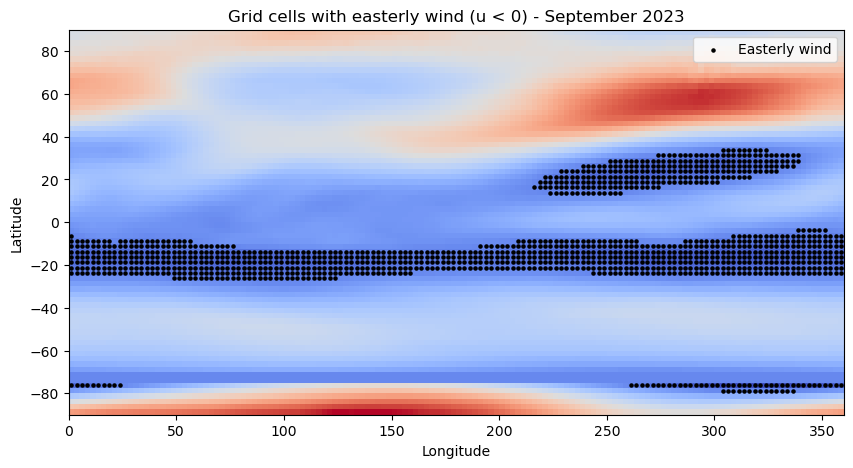

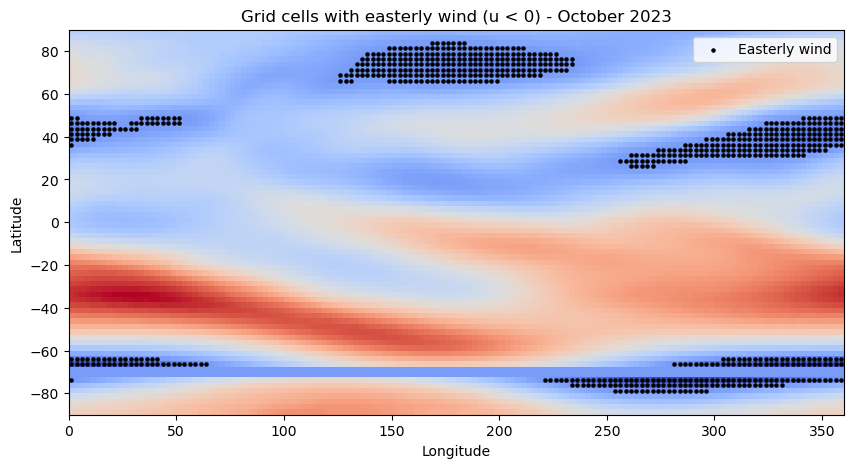

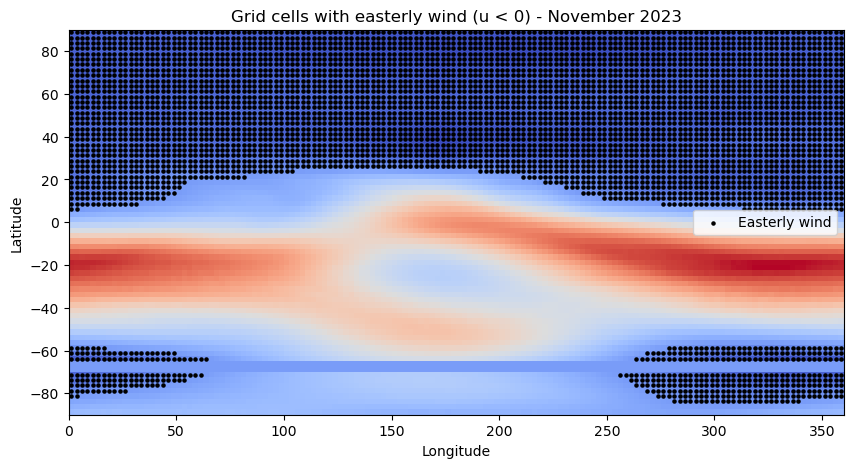

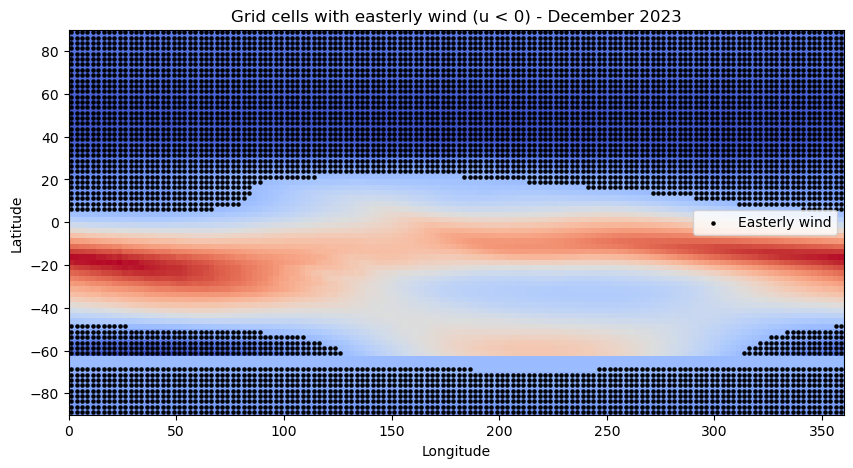

In [69]:
for i in range(12):
    u = u_wind[i,:,:]
    v = v_wind[i,:,:]
    speed = np.sqrt(u**2 + v**2)

    wind_est = np.where(u < 0 ) 
    lat_est = lat2d[wind_est]
    lon_est = lon2d[wind_est]
    #print("Indices where u-component is negative:", wind_est) 
    #print("Corresponding latitudes:", lat_est)
    #print("Corresponding longitudes:", lon_est)

    plt.figure(figsize=(10,5))
    plt.pcolormesh(lon2d, lat2d, u, cmap="coolwarm", shading="auto")
    plt.scatter(lon_est, lat_est, color="black", s=5, label="Easterly wind")
    plt.legend()
    plt.title(f"Grid cells with easterly wind (u < 0) - {months[i]} 2023") 
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()